In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import matplotlib

font = {"size": 12}

matplotlib.rc("font", **font)

In [2]:
with Path("/Users/nils/Documents/repos/MQTBench/evaluation_data.pkl").open("rb") as f:
    eval_data = pickle.load(f)
eval_data = np.array(eval_data)

In [3]:
(
    benchmarks,
    num_qubits,
    depth,
    num_all_gates,
    num_nonlocal_gates,
    program_communication,
    critical_depth,
    entanglement_ratio,
    parallelism,
    liveness,
) = [eval_data[:, i] for i in range(len(eval_data[0]))]

In [4]:
overall_count_indep = 0
indep_qiskit = 0
indep_tket = 0

overall_count_nat = 0
nat_ibm = 0
nat_rigetti = 0
nat_oqc = 0
nat_ionq = 0

overall_count_mapped = 0
mapped_ibm_montreal_count = 0
mapped_ibm_washington_count = 0
mapped_oqc_lucy_count = 0
mapped_rigetti_count = 0
mapped_ionq_count = 0

qiskit_qubit_numbers = []
tket_qubit_numbers = []

for file in benchmarks:
    str_file = str(file)
    if "qiskit" in str_file:
        qiskit_qubit_numbers.append(int(str_file.split("_")[-1].split(".")[0]))
    elif "tket" in str_file:
        tket_qubit_numbers.append(int(str_file.split("_")[-1].split(".")[0]))

    if "indep" in str_file:
        overall_count_indep += 1
        if "indep_qiskit" in str_file:
            indep_qiskit += 1
        if "indep_tket" in str_file:
            indep_tket += 1

    if "nativegates" in str_file:
        overall_count_nat += 1
        if "nativegates_ibm" in str_file:
            nat_ibm += 1
        if "nativegates_rigetti" in str_file:
            nat_rigetti += 1
        if "nativegates_oqc" in str_file:
            nat_oqc += 1
        if "nativegates_ionq" in str_file:
            nat_ionq += 1
    elif "mapped" in str_file:
        overall_count_mapped += 1
        if "mapped_ibm_montreal" in str_file:
            mapped_ibm_montreal_count += 1
        if "mapped_ibm_washington" in str_file:
            mapped_ibm_washington_count += 1
        if "mapped_oqc_lucy" in str_file:
            mapped_oqc_lucy_count += 1
        if "mapped_rigetti" in str_file:
            mapped_rigetti_count += 1
        if "mapped_ionq" in str_file:
            mapped_ionq_count += 1

In [5]:
perc_qiskit_indep = indep_qiskit / overall_count_indep
print(perc_qiskit_indep)
perc_tket_indep = indep_tket / overall_count_indep
print(perc_tket_indep)
print(perc_qiskit_indep + perc_tket_indep, overall_count_indep)

0.5004262574595055
0.49957374254049447
1.0 3519


In [6]:
perc_nat_ibm = nat_ibm / overall_count_nat
print(perc_nat_ibm)
perc_nat_rigetti = nat_rigetti / overall_count_nat
print(perc_nat_rigetti)
perc_nat_oqc = nat_oqc / overall_count_nat
print(perc_nat_oqc)
perc_nat_ionq = nat_ionq / overall_count_nat
print(perc_nat_ionq)
print(sum([perc_nat_ibm, perc_nat_rigetti, perc_nat_oqc, perc_nat_ionq]), overall_count_nat)

0.2511978634828372
0.25013745974393214
0.24860576545440263
0.25005891131882807
1.0 25462


In [7]:
perc_montreal = mapped_ibm_montreal_count / overall_count_mapped
print(perc_montreal)
perc_washington = mapped_ibm_washington_count / overall_count_mapped
print(perc_washington)
perc_oqc = mapped_oqc_lucy_count / overall_count_mapped
print(perc_oqc)
perc_rigetti = mapped_rigetti_count / overall_count_mapped
print(perc_rigetti)
perc_ionq = mapped_ionq_count / overall_count_mapped
print(perc_ionq)
print(sum([perc_montreal, perc_washington, perc_oqc, perc_rigetti, perc_ionq]), overall_count_mapped)

0.14727355692448094
0.4263632215377595
0.04551676933607118
0.3153091489847137
0.06553730321697468
1.0 17532


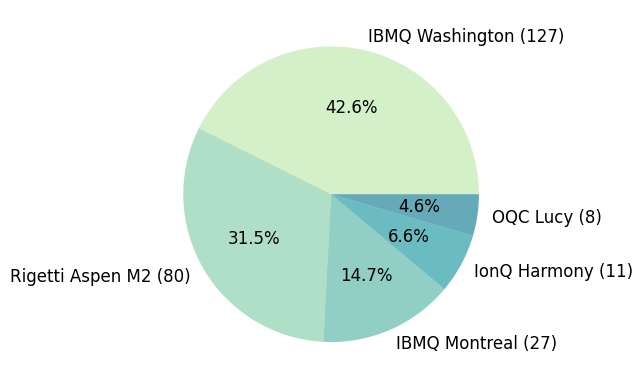

In [29]:
data = [perc_washington, perc_rigetti, perc_montreal, perc_ionq, perc_oqc]
colors = ["#B7E6A5", "#7CCBA2", "#46AEA0", "#089099", "#00718B"]
labels = ["IBMQ Washington (127)", "Rigetti Aspen M2 (80)", "IBMQ Montreal (27)", "IonQ Harmony (11)", "OQC Lucy (8)"]
pies = plt.pie(data, labels=labels, autopct="%1.1f%%", colors=colors)
for pie in pies[0]:
    pie.set_alpha(0.6)
plt.savefig("eval_results/pie.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
overall_count_indep + overall_count_nat + overall_count_mapped

46513

# Num Qubits

In [10]:
len(num_qubits[num_qubits == 61])

249

In [11]:
for i in range(130):
    print(i, len(num_qubits[num_qubits == i]))

0 0
1 0
2 730
3 988
4 1092
5 1142
6 1035
7 1092
8 1037
9 982
10 831
11 987
12 783
13 730
14 674
15 649
16 602
17 646
18 642
19 644
20 520
21 601
22 460
23 523
24 441
25 499
26 439
27 475
28 374
29 402
30 374
31 376
32 373
33 376
34 373
35 375
36 373
37 375
38 373
39 374
40 373
41 375
42 381
43 375
44 373
45 375
46 374
47 376
48 373
49 375
50 375
51 374
52 374
53 377
54 374
55 375
56 375
57 377
58 377
59 375
60 297
61 249
62 247
63 249
64 246
65 249
66 248
67 250
68 247
69 250
70 247
71 248
72 247
73 249
74 248
75 249
76 247
77 250
78 246
79 248
80 247
81 205
82 206
83 208
84 204
85 207
86 205
87 206
88 205
89 207
90 205
91 206
92 206
93 207
94 203
95 208
96 206
97 207
98 203
99 206
100 204
101 208
102 205
103 207
104 206
105 206
106 205
107 206
108 206
109 205
110 205
111 206
112 205
113 205
114 205
115 207
116 204
117 205
118 203
119 205
120 204
121 207
122 205
123 206
124 205
125 207
126 203
127 205
128 164
129 166


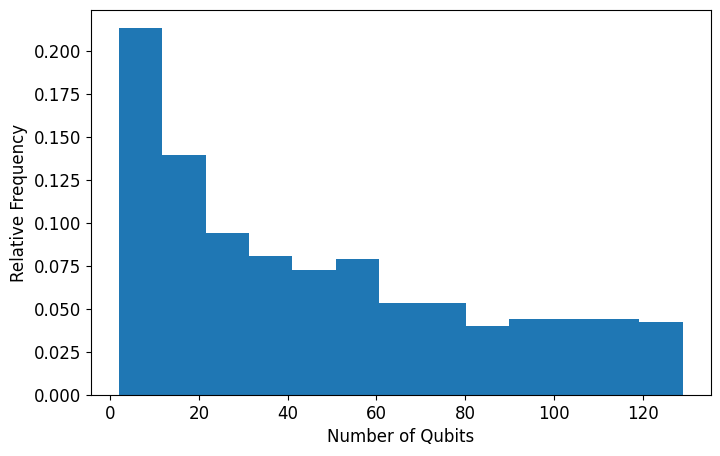

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(num_qubits, weights=np.zeros_like(num_qubits) + 1.0 / num_qubits.size, bins=13)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Qubits")
# plt.savefig("eval_results/num_qubits.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Alternative

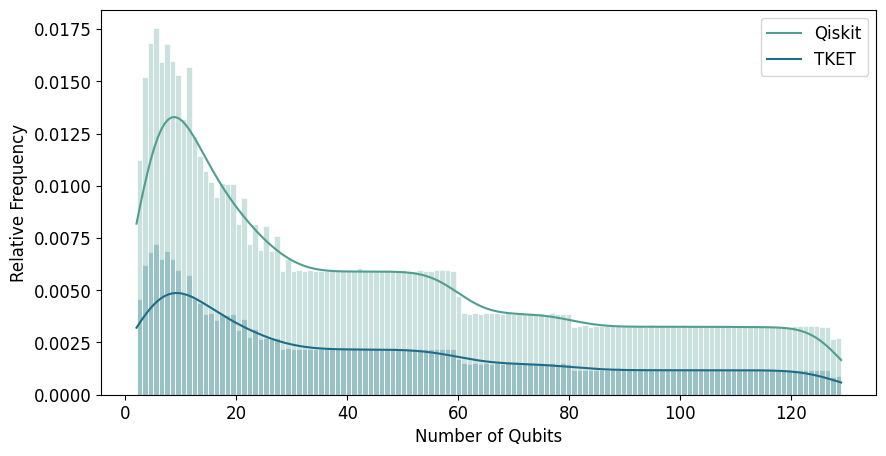

In [13]:
import seaborn as sns

# colors = ['#7CCBA2', '#46AEA0', '#089099', "#00718B", "#045275", "#003147"]
# colors = ['#089099', '#003147']
plt.figure(figsize=(10, 5))
plot = sns.histplot(
    data=[qiskit_qubit_numbers, tket_qubit_numbers],
    bins=128,
    stat="density",
    alpha=0.3,
    kde=True,
    edgecolor="white",
    linewidth=0.5,
    palette="crest",
)
# plt.colorbar(colors)
plt.legend(["TKET", "Qiskit"], reverse=True)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Qubits")
plt.savefig("eval_results/qubit_dist.pdf", format="pdf", bbox_inches="tight")
plt.show()

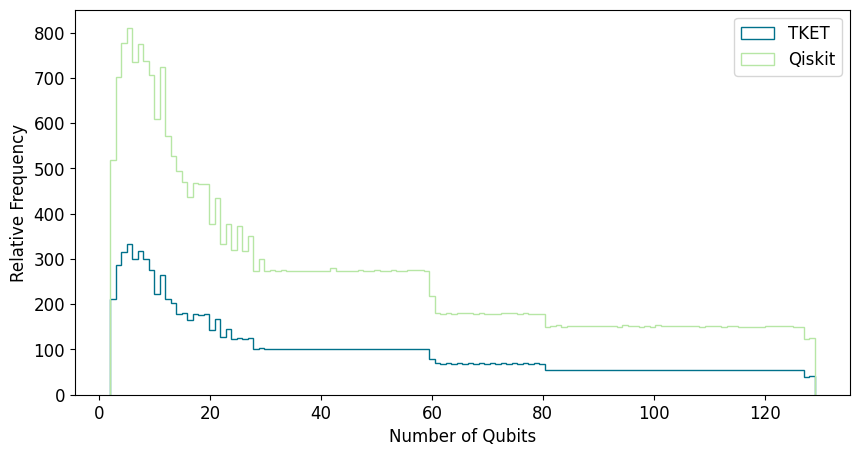

In [14]:
plt.figure(figsize=(10, 5))
labels = ["Qiskit", "TKET"]
colors = ["#B7E6A5", "#00718B"]
plt.hist(
    [qiskit_qubit_numbers, tket_qubit_numbers],
    bins=128,
    stacked=False,
    density=False,
    color=colors,
    label=labels,
    histtype="step",
)
plt.legend()
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Qubits")
# plt.savefig("eval_results/qubit_dist.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Depth

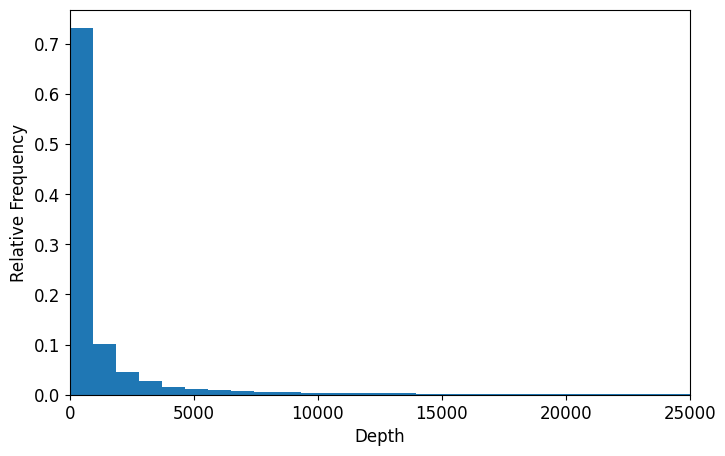

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(depth, weights=np.zeros_like(depth) + 1.0 / depth.size, bins=10000)
plt.ylabel("Relative Frequency")
plt.xlabel("Depth")
plt.xlim(0, 25000)
# plt.savefig("eval_results/depth.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Num Gates

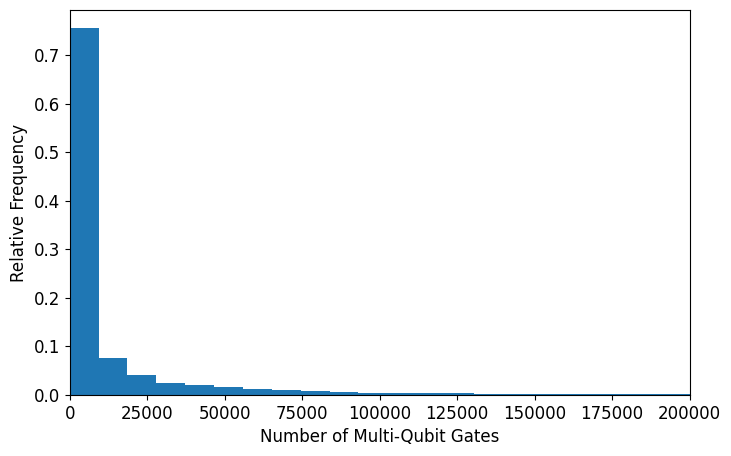

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(num_all_gates, weights=np.zeros_like(num_all_gates) + 1.0 / num_all_gates.size, bins=1000)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Multi-Qubit Gates")
# plt.savefig("eval_results/num_all_gates.pdf", format="pdf", bbox_inches="tight")
plt.xlim(0, 200000)
plt.show()

# Num Multi-Qubit Gates

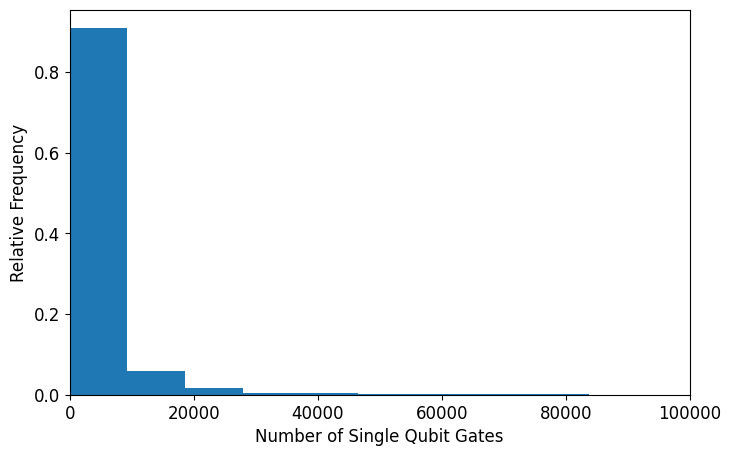

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(num_nonlocal_gates, weights=np.zeros_like(num_nonlocal_gates) + 1.0 / num_nonlocal_gates.size, bins=1000)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Single Qubit Gates")
# plt.savefig("eval_results/num_nonlocal_gates.pdf", format="pdf", bbox_inches="tight")
plt.xlim(0, 100000)
plt.show()

# Percentage Multi-Qubit Gates

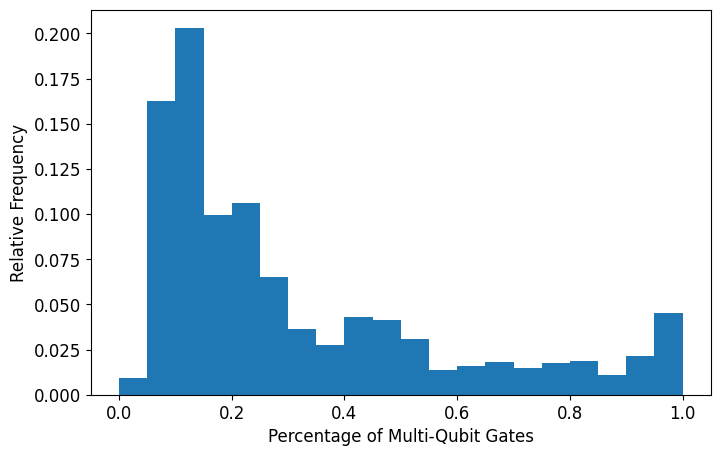

In [18]:
plt.figure(figsize=(8, 5))
perc_multi = num_nonlocal_gates / num_all_gates
plt.hist(perc_multi, weights=np.zeros_like(perc_multi) + 1.0 / perc_multi.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Percentage of Multi-Qubit Gates")
# plt.savefig("eval_results/num_nonlocal_gates.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Program Communication

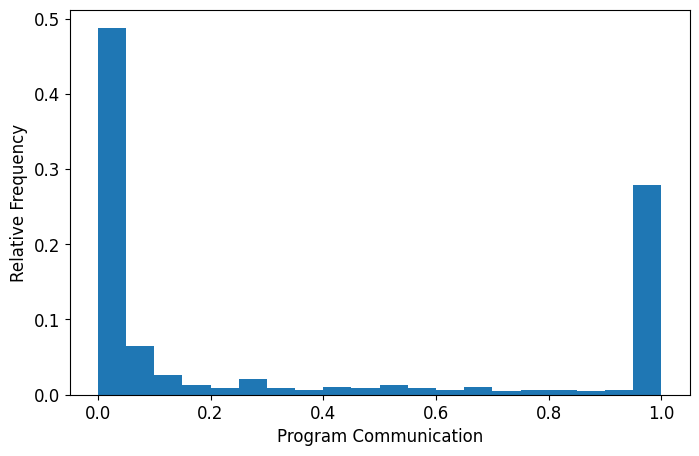

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(
    program_communication, weights=np.zeros_like(program_communication) + 1.0 / program_communication.size, bins=20
)
plt.ylabel("Relative Frequency")
plt.xlabel("Program Communication")
# plt.savefig("eval_results/program_communication.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Critical Depth

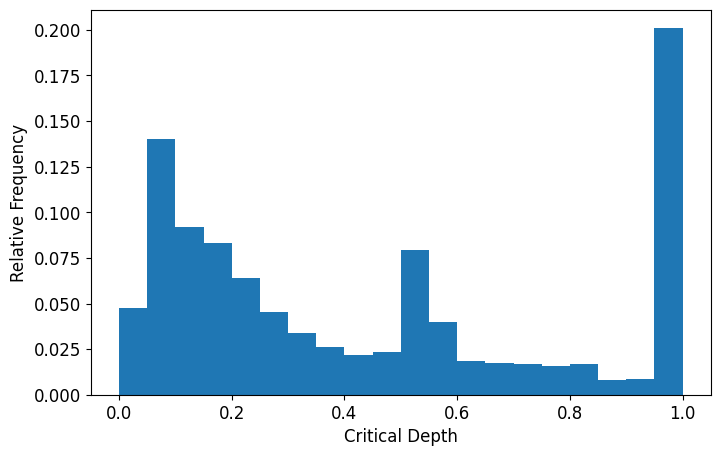

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(critical_depth, weights=np.zeros_like(critical_depth) + 1.0 / critical_depth.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Critical Depth")
# plt.savefig("eval_results/critical_depth.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Entanglement Ratio

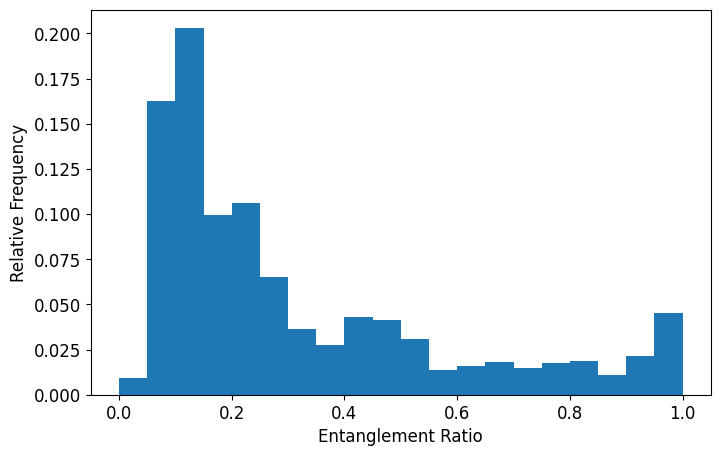

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(entanglement_ratio, weights=np.zeros_like(entanglement_ratio) + 1.0 / entanglement_ratio.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Entanglement Ratio")
# plt.savefig("eval_results/entanglement_ratio.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Parallelism

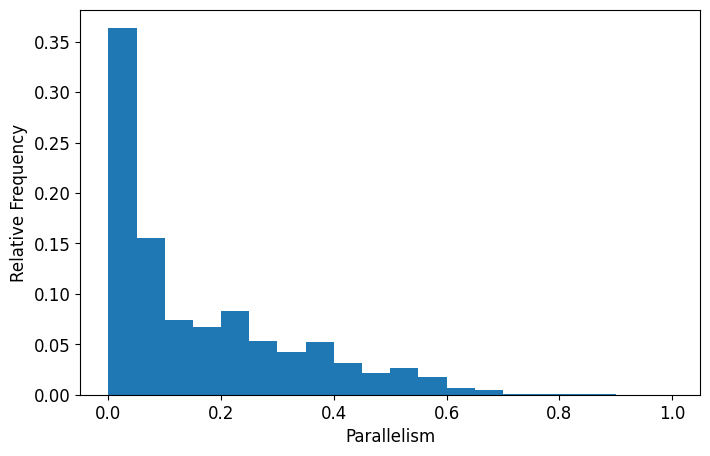

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(parallelism, weights=np.zeros_like(parallelism) + 1.0 / parallelism.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Parallelism")
# plt.savefig("eval_results/parallelism.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Liveness

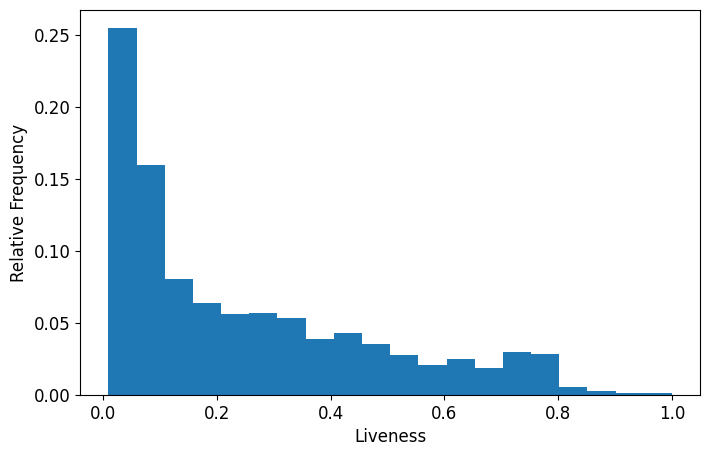

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(liveness, weights=np.zeros_like(liveness) + 1.0 / liveness.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Liveness")
# plt.savefig("eval_results/liveness.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Combining Qubit Counts and Depth in one Plot

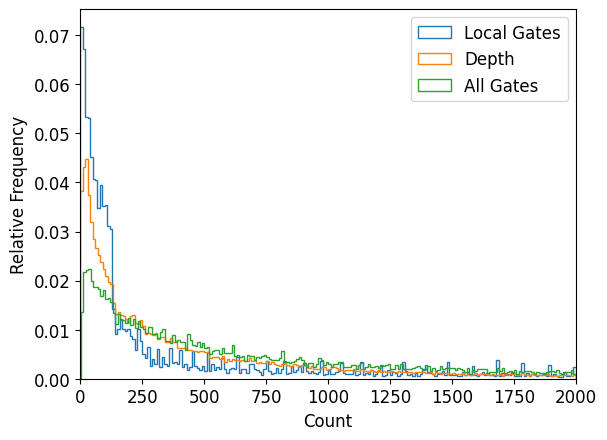

In [24]:
threshold = 2000
bins = int(threshold / 10)
filtered_num_nonlocal_gates = num_nonlocal_gates[num_nonlocal_gates < threshold]
filtered_depth = depth[depth < threshold]
filtered_num_all_gates = num_all_gates[num_all_gates < threshold]
plt.hist(
    filtered_num_nonlocal_gates,
    weights=np.zeros_like(filtered_num_nonlocal_gates) + 1.0 / filtered_num_nonlocal_gates.size,
    bins=bins,
    histtype="step",
    label="Local Gates",
)
plt.hist(
    filtered_depth,
    weights=np.zeros_like(filtered_depth) + 1.0 / filtered_depth.size,
    bins=bins,
    histtype="step",
    label="Depth",
)
plt.hist(
    filtered_num_all_gates,
    weights=np.zeros_like(filtered_num_all_gates) + 1.0 / filtered_num_all_gates.size,
    bins=bins,
    histtype="step",
    label="All Gates",
)
plt.xlim(0, threshold)
plt.legend()
plt.ylabel("Relative Frequency")
plt.xlabel("Count")
plt.show()
# plt.savefig("eval_results/counts.pdf", format="pdf", bbox_inches="tight")

In [25]:
print(len(filtered_num_nonlocal_gates) / len(num_nonlocal_gates))
print(len(filtered_depth) / len(depth))
print(len(filtered_num_all_gates) / len(num_all_gates))

0.7070281426697912
0.842044159697289
0.559456496033367


In [26]:
datasets = [
    perc_multi.astype(float),
    program_communication.astype(float),
    critical_depth.astype(float),
    entanglement_ratio.astype(float),
    liveness.astype(float),
    parallelism.astype(float),
]
labels = [
    "Percentage Multi-Qubit Gates",
    "Program Communication",
    "Critical Depth",
    "Entanglement Ratio",
    "Liveness",
    "Parallelism",
]

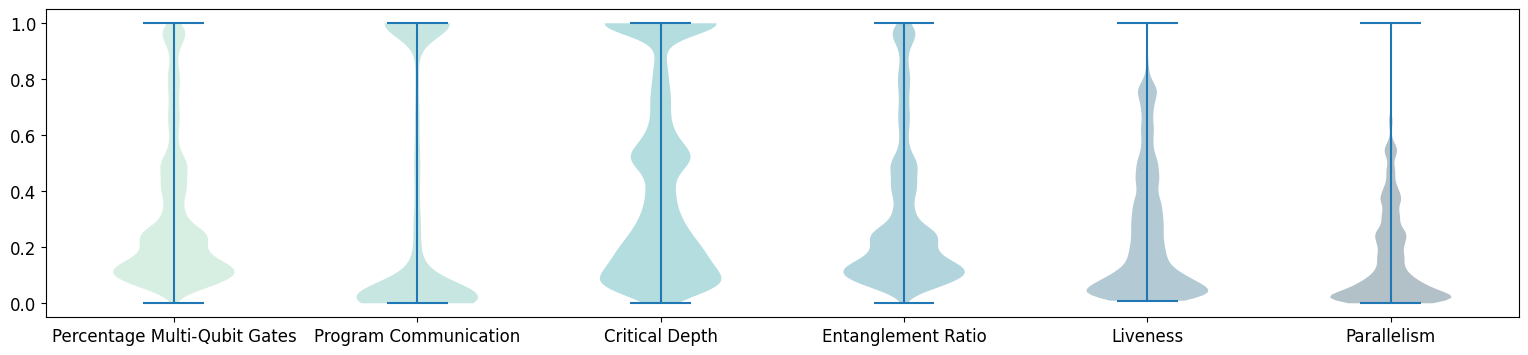

In [27]:
fig = plt.figure(figsize=(19, 4))
ax = fig.add_subplot(111)
colors = ["#7CCBA2", "#46AEA0", "#089099", "#00718B", "#045275", "#003147"]
pos = range(len(datasets))
plots = plt.violinplot(datasets, pos)
for pc, color in zip(plots["bodies"], colors):
    pc.set_facecolor(color)

ax.set_xticks(pos)
plt.xticks(rotation=0)
# plt.title("Distributions of Characteristics")
ax.set_xticklabels(labels)
plt.savefig("eval_results/violins.pdf", format="pdf", bbox_inches="tight")